# Lab 1 - Task 2

In [48]:
# Import of the used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Task 2.1 - Data Import
df = pd.read_csv("framingham.csv")

df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## Task 2.2 - Variables classification

**Demographic**
- Sex: *Nominal*
- Age: *Continuous*

**Behavioral current**
- Education: *Ordinal*
- Smoker: *Nominal*
- cigsPerDay: *Continuous*

**Medical (History)**
- BPMeds: *Nominal*
- prevalentStroke: *Nominal*
- prevalentHyp: *Nominal*
- diabetes: *Nominal*

**Medical (current)**
- totChol: *Continuous*
- sysBP: *Continuous*
- diaBP: *Continuous*
- BMI: *Continuous*
- heartRate: *Continuous*
- glucose: *Continuous*

**Predict variable**
- TenYearCHD: *Nominal*

In [65]:
# Task 2.3 - Print variable names

column_names = list(df)
column_names

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [17]:
# Task 2.4 - Print number of observations

print("The number of observations is ", df.size)

The number of observations is  67808


In [18]:
# Task 2.5 - Number of NA per attribute.

print(df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [22]:
# Task 2.6 - Dataset without NA values

df_nona = df.dropna()
print("Size of dataset without NA rows: ", df_nona.size)
print("Number of rows dropped: ", df.size - df_nona.size)

Size of dataset without NA rows:  58496
Number of rows dropped:  9312


In [32]:
# Task 2.7 - Check that Age is without errors

age_column = df["age"]

negative_ages = age_column[age_column < 0]
implausible_ages = age_column[age_column > 122]

print("Number of negative ages found: ", negative_ages.size)
print("Number of implausible ages found: ", implausible_ages.size)

Number of negative ages found:  0
Number of implausible ages found:  0


In [41]:
# Task 2.8 - Check that total cholesterol does not contains errors

totChol = df["totChol"]

negative_tc = totChol[totChol < 0]
high_tc = totChol[totChol > 10000] # Assuming that anything above 10.000 mg/dL is an error

print("Number of negative values: ", negative_tc.size)
print("Number of values that exceed 10.000 mg/dL: ", high_tc.size)

Number of negative values:  0
Number of values that exceed 10.000 mg/dL:  0


In [47]:
# Task 2.9 - Descriptive statistics for total cholesterol
totChol.describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

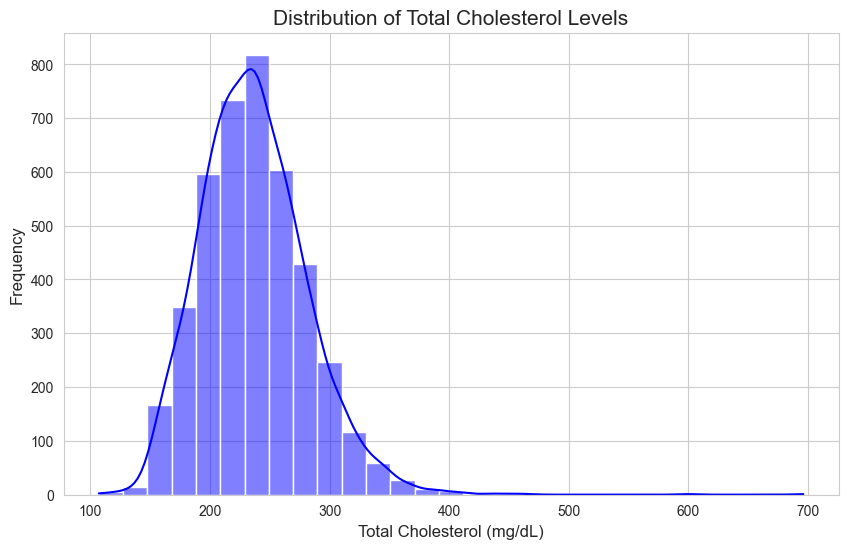

In [49]:
# Task 2.10 - Histogram for total Cholesterol
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.histplot(df["totChol"], kde=True, color='blue', binwidth=20)

plt.title('Distribution of Total Cholesterol Levels', fontsize=15)
plt.xlabel('Total Cholesterol (mg/dL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()

The distribution of the total cholesterol level looks almost symmetric with a positive Skew

In [56]:
# Task 2.11 - How many males in the data set

df_females = df[df["male"] == 0]
df_males = df[df["male"] == 1]

print("Number of females in the dataset: ", df_females.size)
print("Number of males in the dataset: ", df_males.size)

Number of females in the dataset:  38704
Number of males in the dataset:  29104


In [60]:
# Task 2.12 - Mean of Total Cholesterol per gender

tc_females = df_females["totChol"]
tc_males = df_males["totChol"]

print("Mean of Total Cholesterol of females: ", tc_females.mean())
print("Mean of Total Cholesterol of males: ", tc_males.mean())

Mean of Total Cholesterol of females:  239.45959595959596
Mean of Total Cholesterol of males:  233.13134657836645


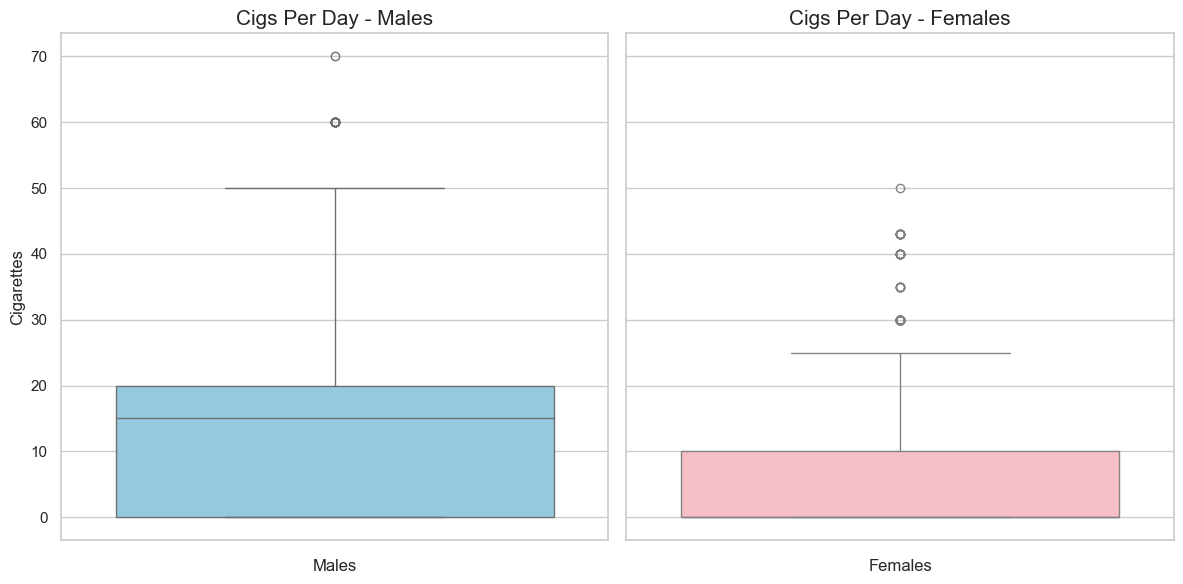

In [74]:
# Task 2.13 - Box plot for cigsPerDay of males/females

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)  

sns.boxplot(y=df_males['cigsPerDay'], ax=axes[0], color='skyblue').set_title('Males')
sns.boxplot(y=df_females['cigsPerDay'], ax=axes[1], color='lightpink').set_title('Females')

axes[0].set_title('Cigs Per Day - Males', fontsize=15)
axes[0].set_ylabel('Cigarettes', fontsize=12)
axes[0].set_xlabel('Males', fontsize=12)

axes[1].set_title('Cigs Per Day - Females', fontsize=15)
axes[1].set_xlabel('Females', fontsize=12)

plt.tight_layout()
plt.show()

Males 

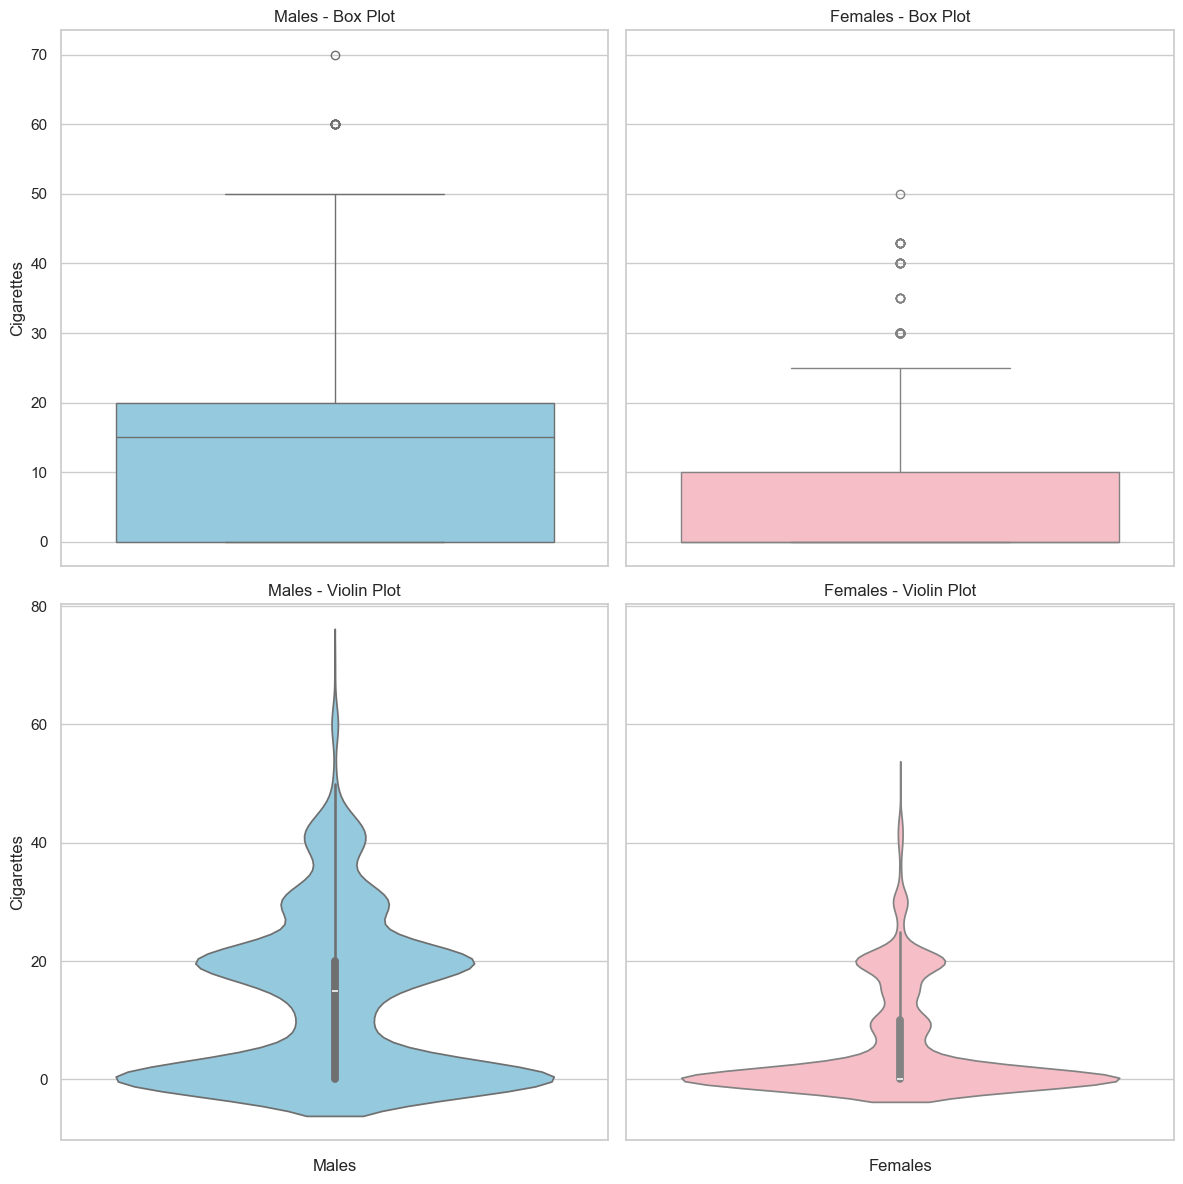

In [75]:
sns.set(style="whitegrid")

# Create a figure with 2 rows and 2 columns
# The first row for box plots, the second row for violin plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharex='col', sharey='row')

# Plot box plots for males and females
sns.boxplot(y=df_males['cigsPerDay'], ax=axes[0, 0], color='skyblue').set_title('Males - Box Plot')
sns.boxplot(y=df_females['cigsPerDay'], ax=axes[0, 1], color='lightpink').set_title('Females - Box Plot')

# Plot violin plots for males and females
sns.violinplot(y=df_males['cigsPerDay'], ax=axes[1, 0], color='skyblue').set_title('Males - Violin Plot')
sns.violinplot(y=df_females['cigsPerDay'], ax=axes[1, 1], color='lightpink').set_title('Females - Violin Plot')

# Setting labels for clarity
axes[0, 0].set_ylabel('Cigarettes', fontsize=12)
axes[1, 0].set_ylabel('Cigarettes', fontsize=12)
# For the upper row (box plots), x-labels are not necessary as they will share with the violin plots
axes[1, 0].set_xlabel('Males', fontsize=12)
axes[1, 1].set_xlabel('Females', fontsize=12)

# Fine-tune the figure; make sure everything is visible and nicely spaced
plt.tight_layout()

# Show plot
plt.show()